In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 700)

This notebook analyzes the correlation between SOD and PMI.

# Import PMI-SOD-labeled data 

In [9]:
# import SOD-labeled data
df_pmi_sod = pd.read_csv('./data/img_PMIs_to_SOD.csv')
display(df_pmi_sod.head())
print(df_pmi_sod.shape)
display(df_pmi_sod.info())

,path,label,img,new_id,new_img,old_path,new_path,old_id,old_img,old_month,old_day,old_yr,old_date,date_placed_ARF,img_pmi_days
0,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000122.08.JPG,2,00000122.08.JPG,000,00000122.08.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_22_2018 (8).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000122.08.JPG,UT01-18D,UT01-18D_01_22_2018 (8).JPG,1,22,2018,2018-01-22,2018-01-21,1.0
1,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000129.14.JPG,2,00000129.14.JPG,000,00000129.14.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_01_29_2018 (14).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000129.14.JPG,UT01-18D,UT01-18D_01_29_2018 (14).JPG,1,29,2018,2018-01-29,2018-01-21,8.0
2,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000213.21.JPG,2,00000213.21.JPG,000,00000213.21.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_02_13_2018 (21).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000213.21.JPG,UT01-18D,UT01-18D_02_13_2018 (21).JPG,2,13,2018,2018-02-13,2018-01-21,23.0
3,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000219.07.JPG,3,00000219.07.JPG,000,00000219.07.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_02_19_2018 (7).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000219.07.JPG,UT01-18D,UT01-18D_02_19_2018 (7).JPG,2,19,2018,2018-02-19,2018-01-21,29.0
4,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000222.08.JPG,3,00000222.08.JPG,000,00000222.08.JPG,/da1_data/icputrd/arf/mean.js/public/2018/UT01-18D/Daily Photos/UT01-18D_02_22_2018 (8).JPG,/da1_data/icputrd/arf/mean.js/public/anau_img3/000/00000222.08.JPG,UT01-18D,UT01-18D_02_22_2018 (8).JPG,2,22,2018,2018-02-22,2018-01-21,32.0


(3417, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3417 entries, 0 to 3416
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   path             3417 non-null   object 
 1   label            3417 non-null   int64  
 2   img              3417 non-null   object 
 3   new_id           3417 non-null   object 
 4   new_img          3417 non-null   object 
 5   old_path         3417 non-null   object 
 6   new_path         3417 non-null   object 
 7   old_id           3417 non-null   object 
 8   old_img          3417 non-null   object 
 9   old_month        3417 non-null   int64  
 10  old_day          3417 non-null   int64  
 11  old_yr           3417 non-null   int64  
 12  old_date         3417 non-null   object 
 13  date_placed_ARF  3417 non-null   object 
 14  img_pmi_days     3417 non-null   float64
dtypes: float64(1), int64(4), object(10)
memory usage: 400.6+ KB


None

In [15]:
# split data by SOD
df_pmi_one = df_pmi_sod[df_pmi_sod.label == 1]
print(df_pmi_one.shape)
df_pmi_two = df_pmi_sod[df_pmi_sod.label == 2]
print(df_pmi_two.shape)
df_pmi_three = df_pmi_sod[df_pmi_sod.label == 3]
print(df_pmi_three.shape)
df_pmi_four = df_pmi_sod[df_pmi_sod.label == 4]
print(df_pmi_four.shape)

# keep only 1-3 quartiles 
df_pmi_one = df_pmi_one[df_pmi_one.img_pmi_days <=3].copy()
print(df_pmi_one.shape)
df_pmi_two = df_pmi_two[df_pmi_two.img_pmi_days <=57].copy()
print(df_pmi_two.shape)
df_pmi_three = df_pmi_three[df_pmi_three.img_pmi_days <=58].copy()
print(df_pmi_three.shape)
df_pmi_four = df_pmi_four[df_pmi_four.img_pmi_days <= 67].copy()
print(df_pmi_four.shape)

# concat into one df
df_pmi_sod_filtered = pd.concat([df_pmi_one, df_pmi_two, df_pmi_three, df_pmi_four])
print(df_pmi_sod_filtered.shape)

(518, 15)
(1319, 15)
(782, 15)
(798, 15)
(397, 15)
(997, 15)
(589, 15)
(598, 15)
(2581, 15)


In [25]:
# correlation using all quartiles
df_pmi_sod['label'].corr(np.log10(df_pmi_sod['img_pmi_days']+1*(10**-4)))

0.5205515218685217

In [24]:
# correlation using 1-3 quartiles
df_pmi_sod_filtered['label'].corr(np.log10(df_pmi_sod_filtered['img_pmi_days']+1*(10**-4)))

0.591449049259131

<AxesSubplot: xlabel='img_pmi_days', ylabel='label'>

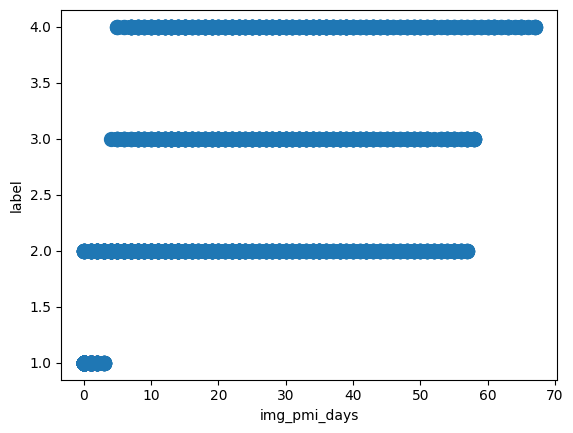

In [26]:
df_pmi_sod_filtered.plot.scatter(x = 'img_pmi_days', y = 'label', s = 100)